# Analyzing Geiger Counter Data

<p>This python script is designed for the AWARE RM-60 <i>Micro Roentgen Radiation Monitor</i> though it should work with data from other counters.</p>
<p>The RM-60 is connected to and powered by an Arduino Uno.</p>
<p>The Arduino code is an interrupt driven counter that for each count outputs the time since the previous count. The data are in seconds. My script that reads the RM-60 saves there time differences to the data file. It also outputs the counts per minute once a minute, along with the cumulative average CPM. This data starts with a <tt>#</tt> character so it can be filtered out as a comment. </p>
<p>This script reads the data files from disk and puts the arrival time differences into a <tt>numpy</tt> array. Right now the script prints out the files with the suffix <tt>.csv</tt>. Right now there is a maximum of 200000 data points.</p>

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pylab as plt
import numpy as np
import glob
fileList = glob.glob('*.csv')
fileList.sort()
for (i,fileName) in enumerate(fileList):
    print "%d - %s" % (i, fileName)
iFile = int(raw_input("Enter the number of the data file: "))
fileName = fileList[iFile]
MAX_DATA = 200000

0 - CPM-DIS.csv
1 - R-112mm.csv
2 - R-12mm.csv
3 - R-137mm.csv
4 - R-37mm.csv
5 - R-62mm.csv
6 - R-87mm.csv
7 - RM60-201802221411.csv


Enter the number of the data file:  4

In [3]:
fpData = open(fileName, 'r')
dataArray = np.genfromtxt(fileName, dtype=type(0.), comments='#', delimiter=',')
fpData.close()
nPoints = len(dataArray)
print "Read %d arrival time intervals" % (nPoints)

Read 2260 arrival time intervals


<p>Now print out some information about the data.</p>
<p>There often seems to be a very rogue data point. Try to edit those out.</p>

0.137722976106
Now there are 2260 data points
Here are the first 20 data points:
[ 0.0215    0.168308  0.261148  0.122054  0.127197  0.04736   0.073056
  0.226235  0.011959  0.344732  0.073316  0.095343  0.001305  0.093698
  0.016296  0.088528  0.181976  0.010282  0.043498  0.435383]
The data range is from 0.000 to 0.901
The average and standard deviation are 0.13772 +/- 0.13394
The standard deviation of the mean is 0.00282
The median of the data is 0.100
Average Counts per Minute = 435.657155
There were 11 zero intervals


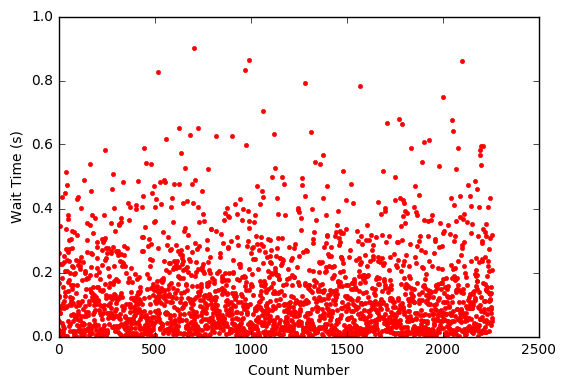

In [4]:
nPoints =  len(dataArray)
avg0 = np.average(dataArray)
print avg0
std0 = np.std(dataArray)
print "Now there are %d data points" %(nPoints)
print "Here are the first 20 data points:\n", dataArray[:20]
print "The data range is from %.3f to %.3f" % (np.min(dataArray), np.max(dataArray))
print "The average and standard deviation are %.5f +/- %.5f" % (avg0, std0)
print "The standard deviation of the mean is %.5f" % (np.std(dataArray)/np.sqrt(nPoints))
print "The median of the data is %.3f" % (np.median(dataArray))
print "Average Counts per Minute = %f" % (60.0 / np.average(dataArray))
print "There were %d zero intervals" % (len(np.where(dataArray < 0.001)[0]))
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.plot(dataArray, 'r.')
ax.set_xlabel("Count Number")
ax.set_ylabel("Wait Time (s)")

<p>Finally plot the histogram on a linear and a logarithmic scale.</p>

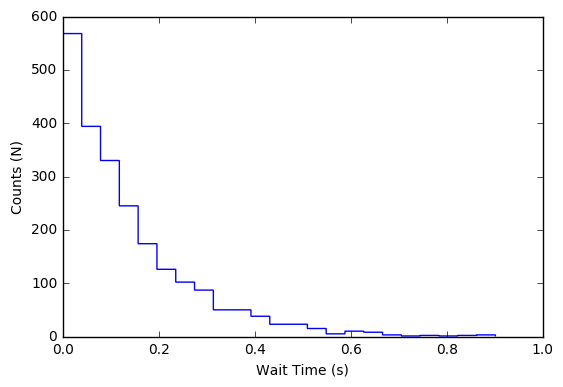

In [5]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
histOut = plt.hist(dataArray,23,histtype='step', log=False)
ax.set_xlabel("Wait Time (s)")
ax.set_ylabel("Counts (N)")


(1, 100)

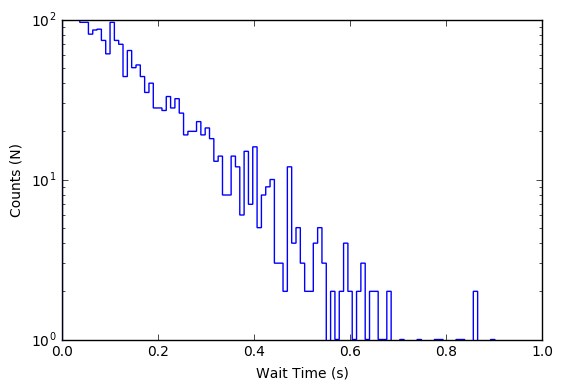

In [6]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
histOut = plt.hist(dataArray,100,histtype='step', log=True)
ax.set_xlabel("Wait Time (s)")
ax.set_ylabel("Counts (N)")
ax.set_ylim(1,100)

width =  0.0358152980416
Using 25 bins


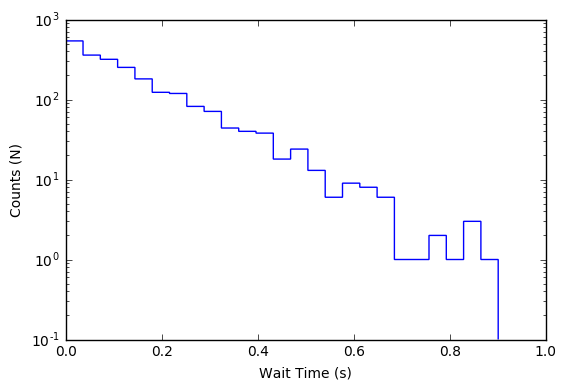

In [7]:
width = 3.5 * std0 / nPoints**(.333)
print "width = ", width
nBins = int(np.max(dataArray) / width)
print "Using %d bins" % (nBins)
bins = np.arange(0, np.max(dataArray), width)
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
histOut = plt.hist(dataArray,nBins,histtype='step', log=True)
ax.set_xlabel("Wait Time (s)")
ax.set_ylabel("Counts (N)")